In [225]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# import libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
lambda_list = [0.01, 0.1, 1, 10, 100, 1000]
data_path = "./drive/My Drive/ML/hw2/data/" # colab path

In [0]:
def RMSE(y_actual, y_pred):
    return np.sqrt( np.mean( (y_actual - y_pred)**2))

In [0]:
def RMS(x):
    return np.sqrt( np.mean( np.square(x)))

In [0]:
def get_data(folder, name):
    x = np.loadtxt(open(folder + name + "Data.csv", "rb"), delimiter=",", skiprows=0)
    y = np.loadtxt(open(folder + name + "Labels.csv", "rb"), delimiter=",", skiprows=0)
    print('loaded', x.shape, y.shape)
    return x,y

In [0]:
def preprocess_data(x,y):
    x, y = x[...,1:], y[...,1:] # removed index column i.e. first column
    print('preprocessed', x.shape, y.shape)
    return x, y

In [0]:
def preprocess_test_data(x):
    x = x[...,1:] # removed index column i.e. first column
    print('preprocessed', x.shape)
    return x

In [0]:
def predict(x,w,b):
    x1 = np.vstack((x,np.ones((1,x.shape[1])))) # appened 1 to each column 
    weights = np.concatenate((w,b[...,np.newaxis]), axis=0)
    return x1.T @ weights

**Objective Function**

In [0]:
def objFunc(x, y, lambda_val, w, b):
    weights = np.concatenate((w,b[...,np.newaxis]))
    prediction = x.T @ weights
    obj_basic = (prediction - y).T @ (prediction - y)
    obj_regularization = lambda_val * np.sum(weights[:-1]**2)
    obj = obj_basic + obj_regularization
    return obj, obj_regularization, obj_basic

**Get weights function using close form solution of ridge regression**

In [0]:
def get_weights(x, y, lambda_identity):
    identity_matrix = np.identity(x.shape[0])
    identity_matrix[-1,-1] = 0 
    x_square = x @ x.T
    lambda_identity = lambda_val * identity_matrix

    first_term = x_square + lambda_identity
    second_term = x @ y
    weights = np.linalg.solve(first_term, second_term)
    w = weights[:-1]
    b = weights[-1]
    return w, b

**Function to find LOOCV error based on formula from  Question 2.5**

In [0]:
def get_loocv_errors(X,y,lambda_val, weights):
    cvErrs = []
    weights_T = weights.T
    
    x1 = np.vstack((X,np.ones((1, X.shape[1])))) # appened 1 to each column
    
    identity_matrix = np.identity(x1.shape[0])
    identity_matrix[-1,-1] = 0
    c = x1 @ x1.T + lambda_val * identity_matrix
    c_inverse = np.linalg.inv(c)
    
    for i in range(X.shape[1]):
        train_x = X[:,i]
        train_y = y[i]
        train_x1 = np.concatenate((train_x, np.ones((1)))) # appened 1        
        
        numerator = (weights_T @ train_x1 - train_y)
        denominator = (1 - (train_x1.T @ c_inverse @ train_x1))
        
        cvErr = numerator/ denominator
        cvErrs.append(cvErr)
    return cvErrs       
        

**ridgeReg Function definition**

In [0]:
def ridgeReg(X,y,lambda_val):
    
    x1 = np.vstack((X,np.ones((1, X.shape[1])))) # appened 1 to each column
    
    w, b = get_weights(x1, y , lambda_val)
    
    weights = np.concatenate((w,b[...,np.newaxis]))
    
    obj, obj_regularization, obj_basic = objFunc(x1, y, lambda_val, w, b)
    cvErrs = get_loocv_errors(X,y,lambda_val,weights)
    RMS_cvErr = RMS(cvErrs)
    print('rmse of cvErrs=', RMS_cvErr)
    return [w, b, obj, RMS_cvErr]

**Load and pre process data**

In [238]:
# load train data

train_x, train_y = get_data(data_path, 'train')

loaded (5000, 3001) (5000, 2)


In [239]:
# load validation data

val_x, val_y = get_data(data_path, 'val')

loaded (5000, 3001) (5000, 2)


In [240]:
# preprocess

train_x, train_y = preprocess_data(train_x, train_y)
val_x, val_y = preprocess_data(val_x, val_y)

preprocessed (5000, 3000) (5000, 1)
preprocessed (5000, 3000) (5000, 1)


In [241]:
# load test data

test_x = np.loadtxt(open(data_path + 'test' + "Data_new.csv", "rb"), delimiter=",", skiprows=0)
print('loaded', test_x.shape)

loaded (4749, 3001)


In [242]:
test_x = preprocess_test_data(test_x)

preprocessed (4749, 3000)


**1.1 Run Ridge on the training
set, with lambda = 0.01, 0.1, 1, 10, 100, 1000. At each solution, record the root-mean-squared-error (RMSE)
on training, validation and leave-one-out-cross-validation data**

In [243]:
# run ridgeReg

weights_list, obj_list, bias_list, cvErrs_list, train_rmse_list, val_rmse_list = [], [], [], [], [], []
# X = np.concatenate((train_x, val_x)).T
# y = np.concatenate((train_y, val_y))

X = train_x.T
y = train_y

for lambda_val in lambda_list:
    
    print('*'*10)
    print('lambda->', lambda_val)
    [w, b, obj, cvErrs] = ridgeReg(X, y, lambda_val)
    weights_list.append(w)
    bias_list.append(b)
    obj_list.append(obj)
    cvErrs_list.append(cvErrs)

    train_pred = predict(train_x.T, w, b) # prediction on training set
    train_rmse = RMSE(train_y, train_pred)
    train_rmse_list.append(train_rmse)
    print('train_rmse', train_rmse)
    
    val_pred = predict(val_x.T, w, b) # prediction on validation set
    val_rmse = RMSE(val_y, val_pred)
    val_rmse_list.append(val_rmse)
    print('val_rmse', val_rmse)

**********
lambda-> 0.01
rmse of cvErrs= 2.580103521790279
train_rmse 1.1205188247625724
val_rmse 2.5791868257078514
**********
lambda-> 0.1
rmse of cvErrs= 2.182106499121022
train_rmse 1.2238119656960245
val_rmse 2.1574812686463836
**********
lambda-> 1
rmse of cvErrs= 2.009474060889735
train_rmse 1.5780360753182243
val_rmse 1.9967715113690583
**********
lambda-> 10
rmse of cvErrs= 2.3201351657980895
train_rmse 2.189953395751638
val_rmse 2.347705513916286
**********
lambda-> 100
rmse of cvErrs= 2.9965727187353157
train_rmse 2.9709419656108045
val_rmse 3.017105238664671
**********
lambda-> 1000
rmse of cvErrs= 3.3353399803872232
train_rmse 3.3316125921530397
val_rmse 3.345415090847554


**1.2 Plot the train, validation and leave-one-out-cross-validation RMSE values together on a plot against lambda**

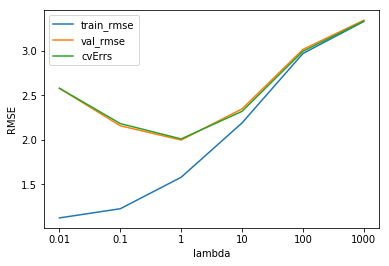

In [244]:
# 1.2 Plot the train, validation and leave-one-out-cross-validation RMSE values together on a plot against lambda

x = np.arange(len(lambda_list))

plt.plot(x, train_rmse_list, label='train_rmse')
plt.plot(x, val_rmse_list, label='val_rmse')
plt.plot(x, cvErrs_list, label='cvErrs')

plt.xticks(x, lambda_list)

plt.legend()
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.show()

**2. What lambda achieve the best best LOOCV performance? For the model using this lambda, report the
objective value, the sum of square errors (on training data), the value of the regularization term.**

In [245]:
# 2. What lambda achieve the best best LOOCV performance? For the model using this lambda, 
#    report the objective value, the sum of square errors (on training data), the value of the regularization term.
best_index = np.argmin(cvErrs_list)
best_lambda_val = lambda_list[best_index]
best_w = weights_list[best_index]
best_b = bias_list[best_index]
print('Lambda having best LOOCV performance is', best_lambda_val)

X = train_x.T
y = train_y
x1 = np.vstack((X,np.ones((1, X.shape[1])))) # appened 1 to each column

obj, obj_regularization, obj_basic = objFunc(x1, y, best_lambda_val, best_w, best_b)
print('Objective Value:', obj[0][0])

print('sum_of_square_errs:', obj_basic[0][0])

print('regularization_val', obj_regularization)

Lambda having best LOOCV performance is 1
Objective Value: 17200.94056872298
sum_of_square_errs: 12450.989275028724
regularization_val 4749.951293694259


**3. Using the model that you computed using lambda that achieves best LOOCV performance, list
the top 10 most important features and the top 10 least important features. Comment if the weights
make sense intuitively.**

In [253]:
# 3. list the top 10 most important features and the top 10 least important features.

features = [line.rstrip('\n') for line in open(data_path + "featureTypes.txt")]

top_n = 10
b_w = best_w.T
b_w[b_w<0] *= -1 # all positive

max_w = (np.argsort(b_w)[0])[-top_n:][::-1]
min_w = (np.argsort(b_w)[0])[0:top_n]

print('*'*25)
print("Top",top_n,"most imp features")
print('*'*25)

for i in max_w:
  print(features[i])
  
print('*'*25)
print("Top",top_n,"least imp features")
print('*'*25)

for i in min_w:
  print(features[i])

*************************
Top 10 most imp features
*************************
infused
pineapple orange
red
flavors nice
sweet black
little heavy
new french
future
currant cola
cocktail
*************************
Top 10 least imp features
*************************
offers
light body
highlights
franc petit verdot
framed
tannins frame
tannins finish
sour
flavors black cherry
oakville


**4. Use your model to predict the points for the reviews in test data. Save
the predicted values on a CSV file predTestLabels.csv**

In [247]:
# run ridgeReg for Kaggle

X = np.concatenate((train_x, val_x)).T
y = np.concatenate((train_y, val_y))

lambda_val = 0.65 # looks better lambda value after experiments
    
print('*'*10)
print('lambda->', lambda_val)
[w, b, obj, cvErrs] = ridgeReg(X, y, lambda_val)

**********
lambda-> 0.65
rmse of cvErrs= 1.896637275925839


In [248]:
# predict and save csv

x = test_x.T

predTest = predict(x, w, b) #prediction on test data using weights got from above cell

ids = [i for i in range (0,len(predTest))]
predTestLabels = np.insert(predTest, 0, ids, axis=1) #adding id column

df = pd.DataFrame(data=predTestLabels, columns = ['Id','Expected']) # numpy to panda dataframe
df.Id = df.Id.astype('uint32')
df.to_csv(data_path + 'predTestLabels.csv', index=False, header=['Id','Expected']) # saved
print('file saved in drive')

file saved in drive
